In [34]:
import sys
import logging
import multiprocessing as mp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelBinarizer
import pickle

In [2]:
coef = pd.read_csv('coef_hierarchical.csv')
coef

,mean,sd,hdi_3%,hdi_97%,mean.1,sd.1,hdi_3%.1,hdi_97%.1,mean.2,sd.2,...,hdi_3%.247,hdi_97%.247,mean.248,sd.248,hdi_3%.248,hdi_97%.248,mean.249,sd.249,hdi_3%.249,hdi_97%.249
0,4.419,4.891,-5.033,12.988,6.513,5.074,-2.923,15.621,12.139,5.406,...,0.111,11.508,3.055,4.761,-5.872,11.794,9.060,4.508,0.467,17.333
1,-2.546,3.658,-9.287,3.802,-4.523,3.287,-11.107,1.324,-6.911,3.335,...,-7.946,0.539,-2.015,3.698,-8.596,5.365,-5.673,2.825,-10.431,0.154
2,-3.879,4.439,-11.364,5.344,-6.656,4.770,-15.308,2.064,-11.309,5.015,...,-10.850,-0.543,-2.657,4.854,-10.964,6.595,-8.677,4.273,-16.679,-0.270
3,-2.919,3.299,-8.877,3.448,-3.836,3.082,-9.508,2.283,-6.197,3.357,...,-8.054,0.610,-2.413,2.952,-8.090,3.128,-4.660,2.708,-10.101,0.377
4,-0.174,1.806,-3.527,3.506,-2.399,1.915,-6.068,1.282,0.123,1.587,...,-3.953,3.086,0.041,2.199,-3.676,4.494,-0.194,1.883,-3.955,3.718
5,-0.037,1.892,-3.430,4.024,1.972,2.108,-2.071,6.187,-0.028,2.010,...,-3.632,3.780,-1.137,2.243,-5.440,3.048,0.314,1.728,-2.953,3.234
6,0.357,1.871,-3.539,4.300,0.381,2.140,-3.350,4.888,-0.045,1.456,...,-3.395,3.162,1.366,2.097,-2.605,5.350,0.172,1.736,-4.223,2.788
7,-0.682,1.887,-4.216,3.292,-1.143,1.757,-4.938,1.685,-0.582,1.867,...,-3.519,3.164,-1.817,1.587,-4.763,1.282,-0.330,1.696,-3.258,3.319
8,0.220,2.025,-4.487,3.724,-0.254,1.641,-3.531,2.822,-0.230,1.562,...,-5.129,3.091,-0.416,1.479,-3.246,2.711,-0.221,1.800,-3.612,3.292
9,0.736,1.578,-2.061,4.102,0.880,2.061,-2.930,4.770,0.708,1.792,...,-4.412,4.237,1.149,1.883,-2.624,4.576,0.704,1.519,-2.456,3.529


In [5]:
feature_top_40 = ['fr_C_O', 'TPSA', 'SMR_VSA1', 'NumHAcceptors', 'NumAromaticCarbocycles','NumHeteroatoms',
                  'Chi4n', 'VSA_EState10', 'VSA_EState3', 'Kappa1', 'Chi2v', 'SMR_VSA10', 'SlogP_VSA2',
                  'HallKierAlpha', 'SMR_VSA5', 'VSA_EState7', 'FractionCSP3', 'SlogP_VSA10', 'BCUT2D_LOGPLOW',
                  'VSA_EState2', 'FpDensityMorgan2', 'fr_phenol_noOrthoHbond', 'SlogP_VSA1', 'PEOE_VSA1',
                  'fr_Ar_N', 'BCUT2D_CHGLO', 'fr_ether', 'EState_VSA1', 'MinPartialCharge', 'VSA_EState6',
                  'MaxPartialCharge', 'MinAbsPartialCharge', 'VSA_EState9', 'SMR_VSA3', 'FpDensityMorgan3',
                  'SlogP_VSA12', 'fr_Al_OH_noTert', 'BalabanJ', 'MaxAbsPartialCharge', 'EState_VSA10']

In [11]:
h_c = coef.iloc[:,::4]
# std_val = np.std(h_c, axis=1)
# h_c = abs(h_c)
# h_c['features'] = feature_top_40
# h_c['mean_val'] = np.mean(h_c.iloc[:,:-1],axis=1)
# h_c['std_val'] = np.std(h_c.iloc[:,:-2], axis=1)
h_c

,mean,mean.1,mean.2,mean.3,mean.4,mean.5,mean.6,mean.7,mean.8,mean.9,...,mean.240,mean.241,mean.242,mean.243,mean.244,mean.245,mean.246,mean.247,mean.248,mean.249
0,4.419,6.513,12.139,4.327,0.125,6.305,7.430,6.004,6.612,8.091,...,4.691,4.999,4.842,2.482,5.529,5.846,1.895,6.126,3.055,9.060
1,-2.546,-4.523,-6.911,-2.671,-0.054,-5.124,-4.277,-3.617,-3.447,-4.656,...,-3.333,-2.751,-2.696,-1.381,-3.440,-3.921,-1.033,-3.555,-2.015,-5.673
2,-3.879,-6.656,-11.309,-4.196,-0.101,-6.801,-6.252,-5.699,-5.683,-8.125,...,-5.300,-4.471,-4.376,-2.148,-5.107,-5.788,-1.723,-5.669,-2.657,-8.677
3,-2.919,-3.836,-6.197,-2.589,-0.020,-4.005,-4.207,-3.479,-3.826,-4.474,...,-3.119,-3.278,-3.251,-2.922,-3.118,-3.979,-1.180,-3.597,-2.413,-4.660
4,-0.174,-2.399,0.123,0.729,-1.234,-0.482,-0.770,-0.375,0.254,0.136,...,-4.028,-0.299,-0.067,0.123,-1.156,-0.228,-0.584,-0.223,0.041,-0.194
5,-0.037,1.972,-0.028,-0.780,1.045,-0.009,0.077,0.838,-0.489,-0.447,...,3.336,-0.215,-0.023,-0.553,0.894,0.501,0.420,0.216,-1.137,0.314
6,0.357,0.381,-0.045,0.003,0.779,-0.274,0.534,0.456,1.073,0.759,...,2.631,0.187,-0.077,1.010,0.717,0.686,0.199,-0.067,1.366,0.172
7,-0.682,-1.143,-0.582,-0.607,-0.917,-0.035,-1.083,-0.918,-0.914,-0.909,...,-2.394,-0.453,-0.717,-0.391,-1.165,-0.653,-0.340,-0.198,-1.817,-0.330
8,0.220,-0.254,-0.230,-1.129,-0.253,-0.512,-0.373,-0.225,-0.551,-0.373,...,-1.653,0.029,-0.231,0.393,0.022,-0.491,-0.127,-0.160,-0.416,-0.221
9,0.736,0.880,0.708,0.722,0.544,0.565,1.092,0.950,1.549,0.618,...,3.021,0.895,0.026,0.956,0.625,0.504,0.227,-0.045,1.149,0.704


In [22]:
coef_assay = []
for i in range(50):
    coef_per_assay = h_c.iloc[:,i::50]
    mean_val = np.mean(coef_per_assay, axis=1)
    std_val = np.std(coef_per_assay, axis=1)
    coef_assay.append(pd.DataFrame(mean_val))

In [28]:
ridge_coef = pd.read_csv('/Users/wenyuzeng/Downloads/bal_acc_per_assay.csv')
assay_name = ridge_coef.assay.tolist()

In [32]:
hbm_coef_per_assay = pd.concat(coef_assay, axis=1)
hbm_coef_per_assay.columns = assay_name
hbm_coef_per_assay['Features'] = feature_top_40
hbm_coef_per_assay = hbm_coef_per_assay.set_index('Features')
hbm_coef_per_assay

,tox21-ahr-p1,tox21-ap1-agonist-p1,tox21-ar-bla-antagonist-p1,tox21-ar-mda-kb2-luc-agonist-p3,tox21-ar-mda-kb2-luc-antagonist-p1,tox21-ar-mda-kb2-luc-antagonist-p2,tox21-are-bla-p1,tox21-aromatase-p1,tox21-car-agonist-p1,tox21-car-antagonist-p1,...,tox21-sbe-bla-antagonist-p1,tox21-shh-3t3-gli3-agonist-p1,tox21-shh-3t3-gli3-antagonist-p1,tox21-vdr-bla-agonist-p1,tox21-vdr-bla-antagonist-p1,tox21-dt40-p1_653,tox21-dt40-p1_100,tox21-dt40-p1_657,tox21-rt-viability-hepg2-p1,tox21-rt-viability-hek293-p1
Features,,,,,,,,,,,,,,,,,,,,,
fr_C_O,4.4172,5.6884,8.0788,3.2966,3.0924,6.0548,8.6888,8.2272,4.9708,7.0040,...,1.4404,5.7516,4.9070,5.4626,5.5672,8.1368,6.0374,6.9414,3.3768,7.7346
TPSA,-2.6522,-3.5220,-4.6652,-2.2392,-2.1300,-4.6988,-4.9420,-4.7974,-2.9542,-4.0396,...,-0.8182,-3.2546,-2.9282,-3.3888,-2.9304,-5.3626,-3.4612,-3.8446,-2.4160,-4.8996
SMR_VSA1,-4.0704,-4.8290,-7.2786,-3.2058,-2.8622,-6.1886,-8.2176,-7.4990,-4.5224,-6.7224,...,-1.0078,-4.9822,-4.3094,-4.8686,-4.9348,-7.5114,-5.2612,-6.0852,-3.7464,-7.2440
NumHAcceptors,-2.6870,-3.2082,-4.3876,-1.9170,-1.8240,-3.6622,-4.6872,-4.6232,-2.9316,-3.3958,...,-1.2830,-3.2986,-2.7774,-3.6738,-3.0354,-4.8676,-3.3750,-4.0596,-2.3314,-4.3574
NumAromaticCarbocycles,-0.4072,-1.0416,-0.0206,0.1456,-0.6642,-0.0894,-1.0592,-0.3852,0.3562,0.1414,...,-3.3976,-0.2660,0.0866,-0.5004,-1.4512,-0.5012,-0.6842,-0.2374,0.2204,-0.1718
NumHeteroatoms,0.2424,0.6808,-0.1830,-0.2994,0.4000,-0.3052,0.5878,0.4086,-0.3528,-0.7370,...,2.3288,-0.0708,-0.1254,0.3274,1.2942,0.7046,0.7328,0.3688,-0.4768,-0.0332
Chi4n,0.0790,0.2250,-0.0520,-0.0354,0.3954,0.0930,0.6310,0.4198,0.6362,0.4402,...,1.0690,0.6208,-0.0116,0.4052,0.7744,0.4420,0.1310,-0.0322,1.0136,0.2250
VSA_EState10,-0.7718,-0.6738,-0.9086,-0.6110,-0.7386,-0.3918,-0.8644,-0.6446,-0.6356,-0.8416,...,-1.4684,-0.5136,-0.2864,-0.3364,-0.9626,-0.3062,-0.3872,-0.5546,-1.3584,-0.3222
VSA_EState3,-0.2168,-0.0372,-0.0140,-0.3286,-0.1008,-0.2754,-0.2870,-0.1950,-0.4412,-0.3950,...,-0.9054,-0.1430,-0.1466,-0.0576,0.0558,-0.0118,-0.0476,0.0294,-0.3616,-0.2610


<Figure size 3000x3000 with 0 Axes>

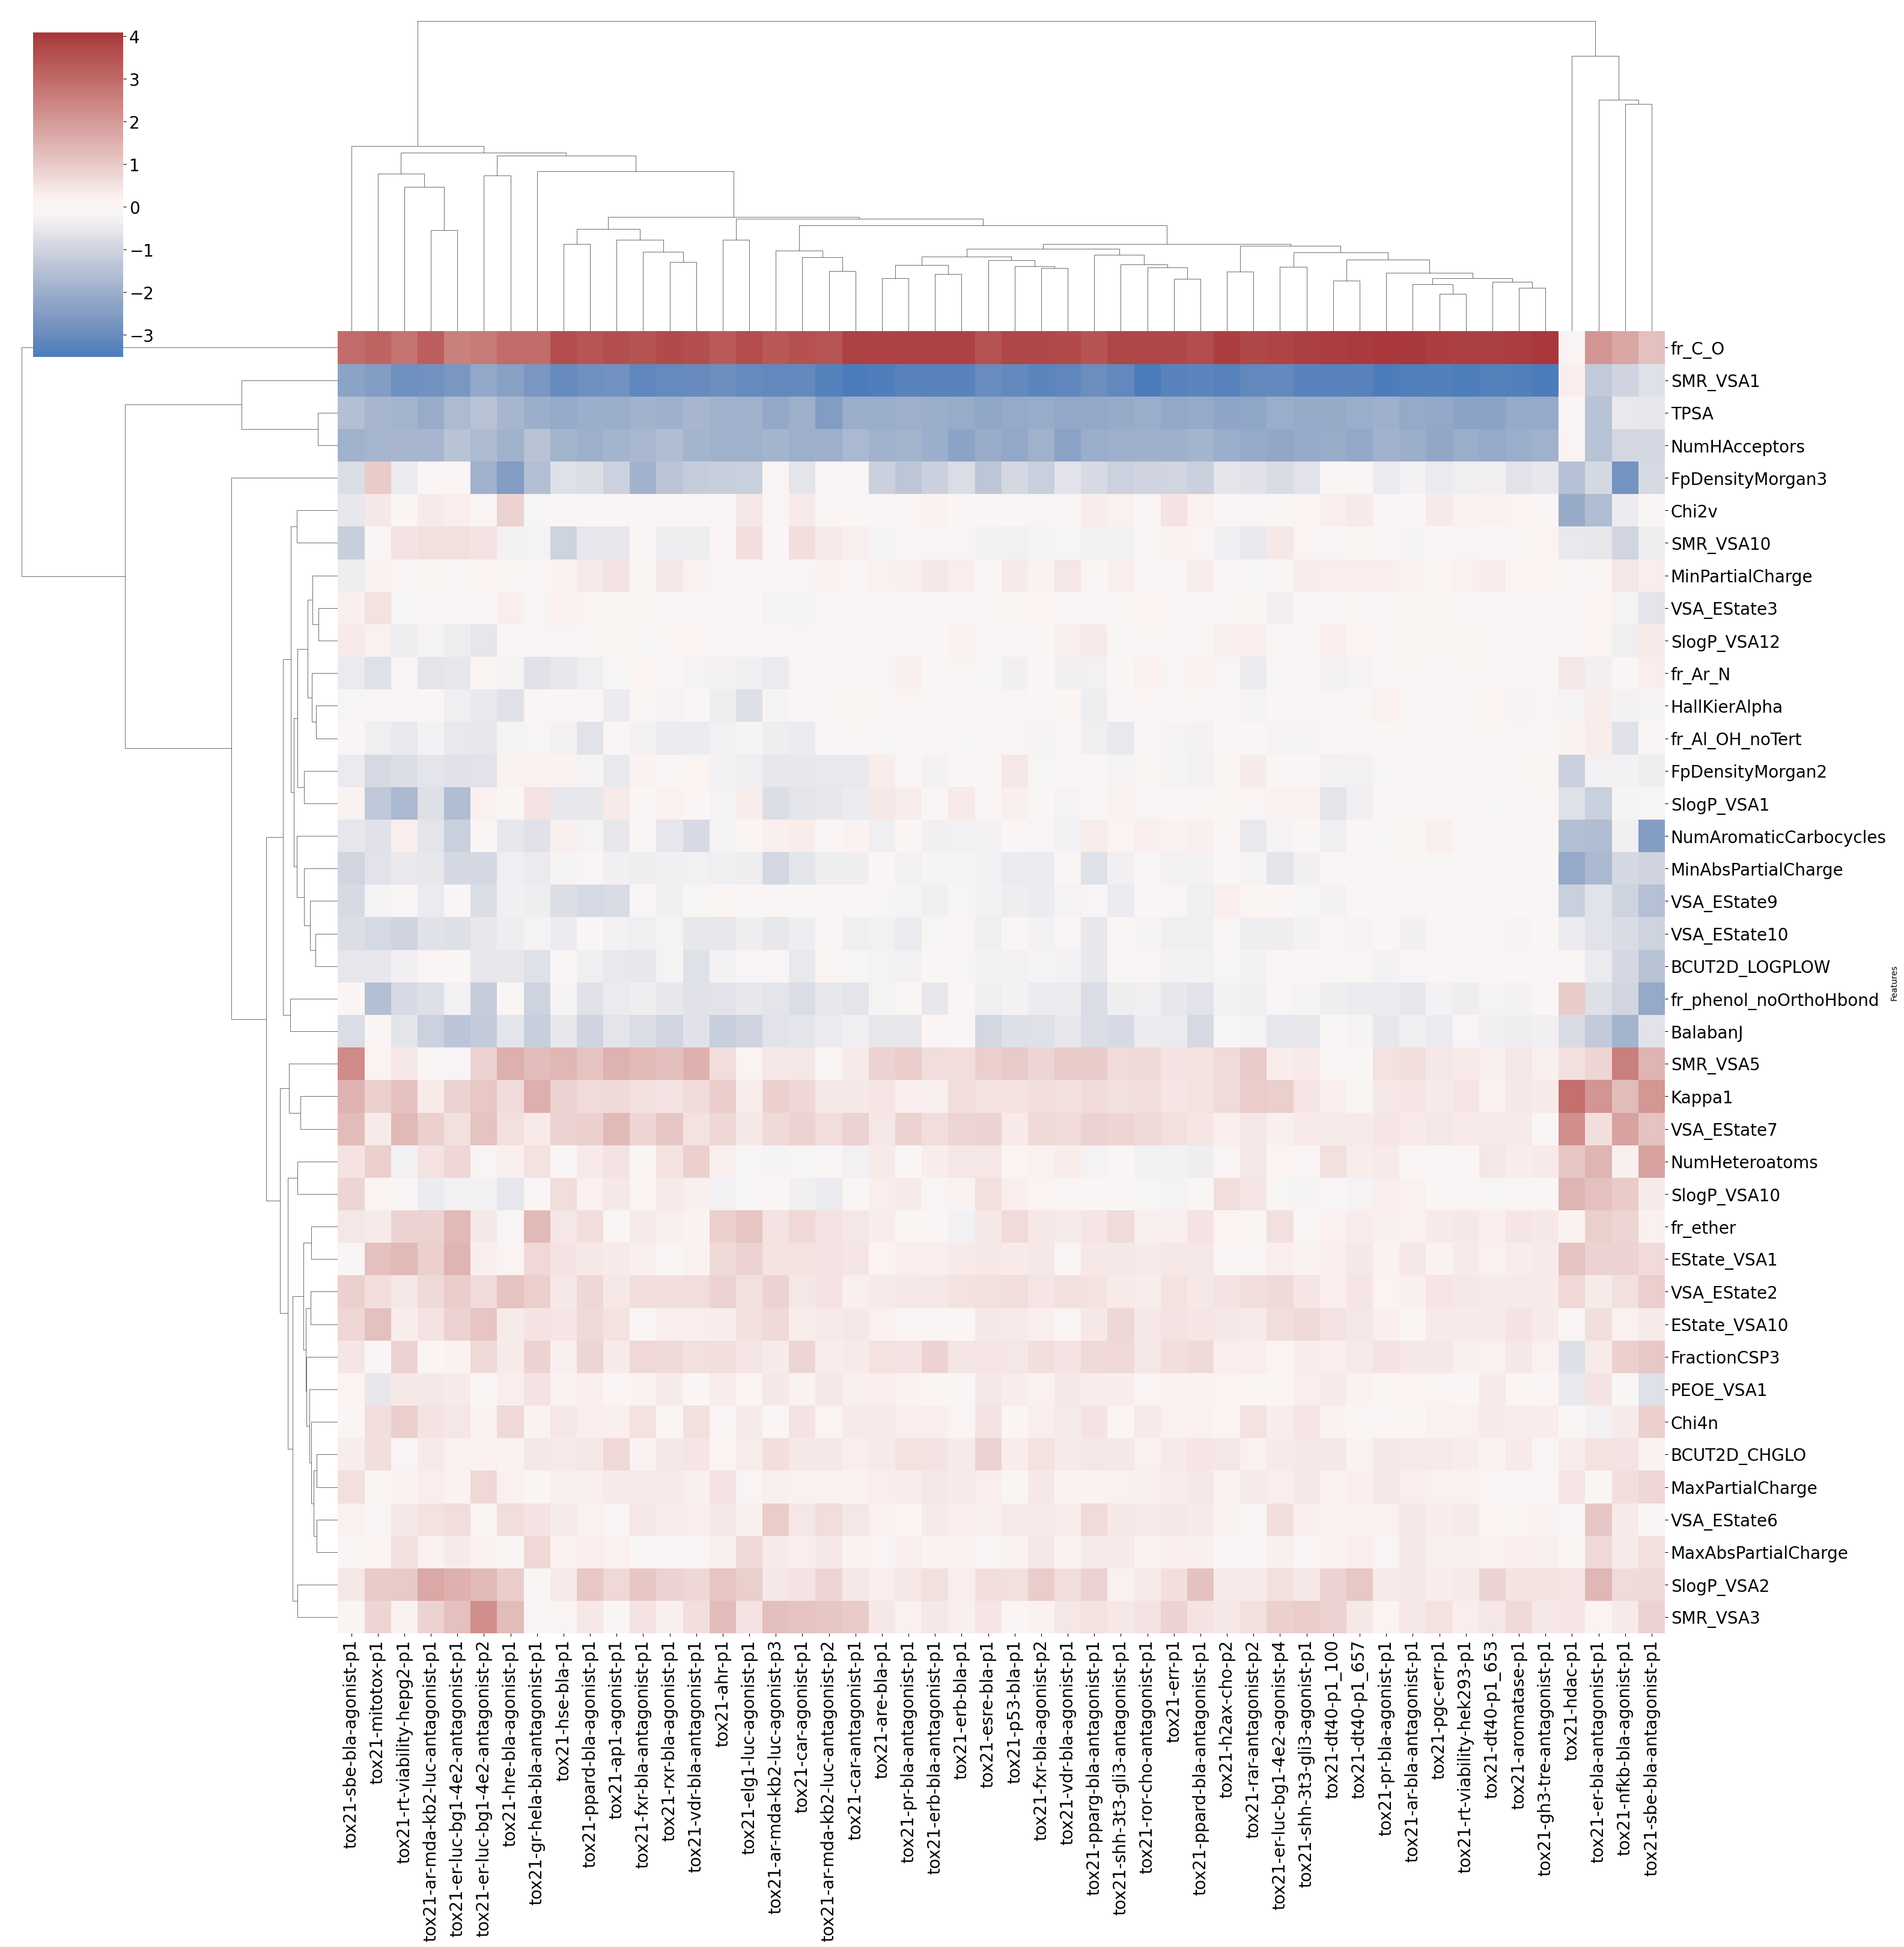

In [37]:
fig = plt.figure(figsize = (30,30))
# ax = sns.heatmap(fea_df.set_index('features'), cmap='vlag')
ax = sns.clustermap(hbm_coef_per_assay, cmap = 'vlag', z_score = 1, center=0, figsize=(30, 30))
# ax.axes.set_title('Assay by Features heatmap',fontsize=30)
# ax.set_xlabel("Assays",fontsize=20)
# ax.set_ylabel("Features",fontsize=20)
ax.tick_params(labelsize=20)
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=20)

plt.savefig('Feature_importance_HBM_ds1.tiff', bbox_inches="tight")
plt.show()